In [ ]:
# Importing Packages
import math, sys
import numpy as np
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm

In [ ]:
# Compute the time-derivative of a Rossler system
def x_dot(x1, y1, z1, x2, y2, z2,alp):
    x1_dot=-1*wo1*y1-z1+alp*(x2-x1)
    x2_dot=-1*wo2*y2-z2+alp*(x1-x2)
    return x1_dot,x2_dot

def y_dot(x1, y1, z1, x2, y2, z2):
    y1_dot=wo1*x1+a*y1
    y2_dot=wo2*x2+a*y2
    return y1_dot,y2_dot

def z_dot(x1, y1, z1, x2, y2, z2):
    z1_dot=b+z1*(x1-c)
    z2_dot=b+z2*(x2-c)
    return z1_dot,z2_dot

In [ ]:
# Average Frequencies
def avg_fq(x1,x2,y1,y2):
  P1=[]
  P2=[]
  Omega1,Omega2,D_Omega=[],[],[]
  P10=np.arctan2(y1[0],x1[0])
  P20=np.arctan2(y2[0],x2[0])
  for i,j,k,l in zip(x1[1:],y1[1:],x2[1:],y2[1:]):
    Omega1.append((np.arctan2(j,i)-P10)/(N*dt))
    Omega2.append((np.arctan2(l,k)-P20)/(N*dt))
  for m,n in zip(Omega1,Omega2):
    D_Omega.append(n-m)
  return D_Omega


In [ ]:
def RungeKutta4(a1,b1,c1,a2,b2,c2,dt, alp, n):

    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)

    x2 = np.zeros(n)
    y2 = np.zeros(n)
    z2 = np.zeros(n)
    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    x2[0] = a2
    y2[0] = b2
    z2[0] = c2
    t[0] = 0

    #Compute the approximate solution at equally spaced times.
    for k in range (n-1):

        t[k+1] = t[k] + dt

        k1,u1 = x_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k],alp)
        l1,v1 = y_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k])
        m1,w1 = z_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k])

        k2,u2 = x_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt),alp)
        l2,v2 = y_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt))
        m2,w2 = z_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),(x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt))

        k3,u3 = x_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt), (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt),alp)
        l3,v3 = y_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt), (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt))
        m3,w3 = z_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt), (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt))

        k4,u4 = x_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt),alp)
        l4,v4 = y_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt))
        m4,w4 = z_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt), (x2[k] + u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt))

        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)
        x2[k+1] = x2[k] + (dt*(u1 + 2*u2 + 2*u3 + u4) / 6)
        y2[k+1] = y2[k] + (dt*(v1 + 2*v2 + 2*v3 + v4) / 6)
        z2[k+1] = z2[k] + (dt*(w1 + 2*w2 + 2*w3 + w4) / 6)

    return x1,y1,z1,x2,y2,z2, t

In [ ]:
""" Initial values unchanged """
wo1 = 0.97+0.02
wo2 = 0.97-0.02
a = 0.165
b= 0.2
c= 10
N= int(2000/0.01)
dt=0.01
O=[]
for alp in tqdm(np.arange(0.00,0.08,0.01)):
  x_1, y_1, z_1, x_2, y_2, z_2, t = RungeKutta4(3,10,15,10,15,25, dt, alp, N)
  d_om=avg_fq(x_1,x_2,y_1,y_2)
  O.append(np.average(d_om))


  0%|          | 0/8 [00:00<?, ?it/s]

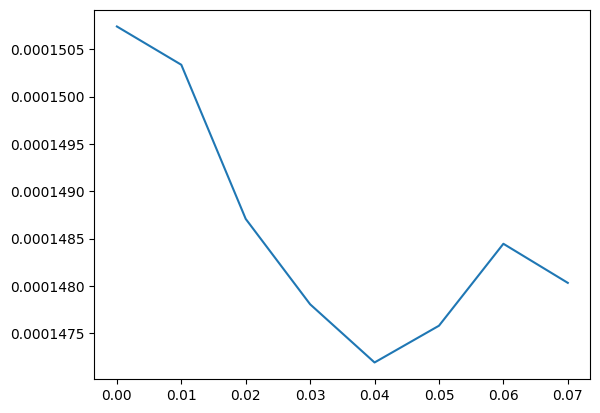

In [ ]:
plt.plot(np.arange(0.00,0.08,0.01),O)

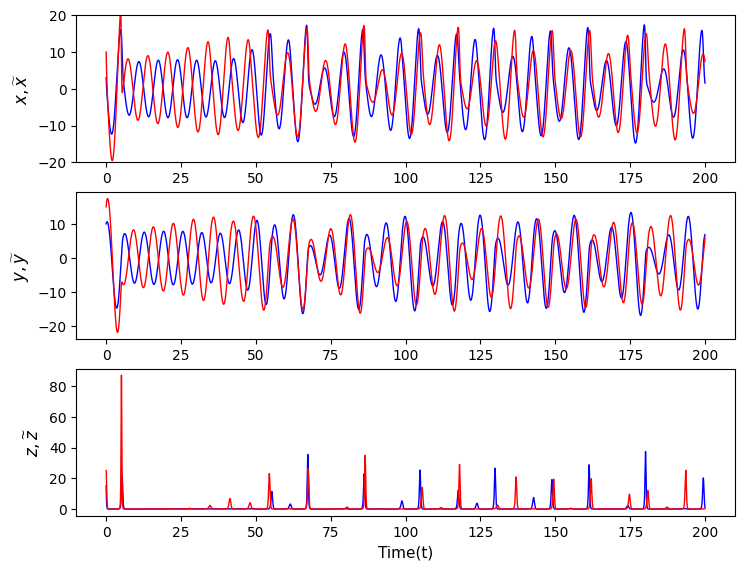

In [ ]:
# Plot
plt.figure (figsize = (8.5,6.5))
plt.subplot(3,1,1)
plt.plot ( t[:20000], x_1[:20000], linewidth = 1, color = 'b' )
plt.plot ( t[:20000], x_2[:20000], linewidth = 1, color = 'r' )
plt.ylim(-20, 20)
plt.ylabel ( r'$x,\widetilde{x}$',fontsize=12)

plt.subplot(3,1,2)
plt.plot ( t[:20000], y_1[:20000], linewidth = 1, color = 'b' )
plt.plot ( t[:20000], y_2[:20000], linewidth = 1, color = 'r' )
#plt.ylim(-30, 30)
plt.ylabel ( r'$y,\widetilde{y}$',fontsize=12)

plt.subplot(3,1,3)
plt.plot ( t[:20000], z_1[:20000], linewidth = 1, color = 'b' )
plt.plot ( t[:20000], z_2[:20000], linewidth = 1, color = 'r' )
plt.xlabel ( 'Time(t)' ,fontsize=11)
plt.ylabel ( r'$z,\widetilde{z}$',fontsize=12)
#plt.ylim(0, 45)
plt.savefig('Phase_Sync.pdf', format='pdf')
plt.show ( )